# 1. THE DATASET

The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

Computer algorithms for recognizing objects in photos often learn by example. CIFAR-10 is a set of images that can be used to teach a computer how to recognize objects. Since the images in CIFAR-10 are low-resolution (32x32), this dataset can allow researchers to quickly try different algorithms to see what works. Various kinds of convolutional neural networks tend to be the best at recognizing the images in CIFAR-10.

CIFAR-10 is a labeled subset of the 80 million tiny images dataset. When the dataset was created, students were paid to label all of the images.

Wikipidia : https://en.wikipedia.org/wiki/CIFAR-10

# 2. RESEARCH

CIFAR-10 was collected and compiled by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. Within the training dataset there are 50000 tiny images,with each image having the dimensions of 32 pixels by 32pixels. There are several parts to the batch files provided.  

There are 5 batch files used for both training and validating the data and a single test batch file. Each batch file is containing 4 components a data, labels, file names and batchlabel component. The test dataset has identical components however, is comprised of only 10000 images. The current published papers mostly use **Convolution network and VGG16 architecture**.  

The highest accuracy achieved so far is **93% with CNN network with data augmentationand batch normalization.**

# 3. IDEA

The purpose of this notebook and project is to conduct a series of experiments on various hyper-parameters of a CNN, to finalize a computationally optimum CNN model that can most closely mimic the pre-trained VGG16 model in terms of accuracy and loss, which are the metrics for our comparison.

# 4. GETTING THE DATA & UNDERSTANDING IT

- We fetch the data from the keras datasets library, which gives us a prepared data of 50,000 training and 10,000 testing images as numpy arrays which have the format of :   
[ImageNo,  
    [PixelRow,PixelColumn,RedChannelValue],  
    [PixelRow,PixelColumn,GreenChannelValue],  
    [PixelRow,PixelColumn,BlueChannelValue]  
]


- We then re-shape the target Y_train and Y_test Numpy arrays to 10 categorical bins for each of our 10 classes and explore our data set

In [ ]:
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

print('Shape of training dataset :', x_train.shape)
print('Shape of testing dataste :' , x_test.shape)

#formatting the dataset 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255.
x_test = x_test/255.

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [ ]:
import matplotlib.pyplot as plt

cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
plt.show()

# 5. EXPERIMENTS

- We looked at various existing architectures that were performing image classification on the CIFAR10 dataset and through our research came across a CNN Model that had the following network architecture, to help us get started :  

    - Convolution Layers : 4
    - Network Architecture : 32, 32, 64, 64
    - Flattened Output Layer : 512

Source : https://blog.plon.io/tutorials/cifar-10-classification-using-keras-tutorial/

In [ ]:
def get_trained_model(activation='relu',loss='categorical_crossentropy', optimizer='sgd', epochs = 20, kernel_initializer ='glorot_uniform',bias_initializer ='glorot_uniform'):
    
  model = Sequential()

  #Layer1
  model.add(Conv2D(32, (2,2), input_shape = x_train.shape[1:], kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
  model.add(Activation(activation))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  #Layer2
  model.add(Conv2D(32, (2,2), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
  model.add(Activation(activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))

  #Layer3
  model.add(Conv2D(64, (2,2), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
  model.add(Activation(activation))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  #Layer4
  model.add(Conv2D(64, (2,2), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
  model.add(Activation(activation))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(BatchNormalization())
  model.add(Activation(activation))
  model.add(Dropout(0.2))

  model.add(Dense(10))
  model.add(Activation('softmax'))
  
  model.compile(loss = loss, optimizer = optimizer, metrics=['accuracy'])
  
  history = model.fit(x = x_train, y = y_train, validation_data = (x_test,y_test), batch_size= 28, epochs= epochs)
  
  return model, history

# HELPER FUNCTION FOR PLOTS

In [ ]:
def train_test_plot(history,epochs):
  plt.figure(0)
  plt.plot(history.history['acc'],'r')
  plt.plot(history.history['val_acc'],'g')
  plt.xticks(np.arange(0, epochs+1, 4.0))
  plt.rcParams['figure.figsize'] = (10, 6)
  plt.xlabel("Num of Epochs")
  plt.ylabel("Accuracy")
  plt.title("Training Accuracy vs Validation Accuracy")
  plt.legend(['train','validation'])

  plt.figure(1)
  plt.plot(history.history['loss'],'r')
  plt.plot(history.history['val_loss'],'g')
  plt.xticks(np.arange(0, epochs+1, 2.0))
  plt.rcParams['figure.figsize'] = (10, 6)
  plt.xlabel("Num of Epochs")
  plt.ylabel("Loss")
  plt.title("Training Loss vs Validation Loss")
  plt.legend(['train','validation'])

## 5.1 ACTIVATION FUNCTIONS

We first tried out different activation functions on our base architecture to see which one provides the best possible validation and testing loss.  
    - ReLU
    - TANH
    - SIGMOID
    - ELU  

Our experiments yielded that **ReLU** performed the best  

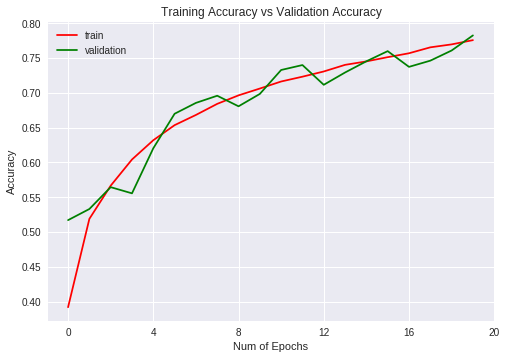

In [ ]:
model0, history0 = get_trained_model() #ReLU
model1, history1 = get_trained_model(activation='tanh')
model2, history2 = get_trained_model(activation='sigmoid')
model3, history3 = get_trained_model(activation='elu')

# 5.2 COST FUNCTIONS

We then proceeded to tried out different cost functions on our base architecture to see which one provides the best possible validation and testing loss.

- MEAN SQUARED ERROR
- CATEGORICAL HINGE
- KULLBACK LIEBLER DIVERGENCE
- COSINE PROXIMITY  

Our experiments yielded that **CATEGORICAL HINGE** performed the best  

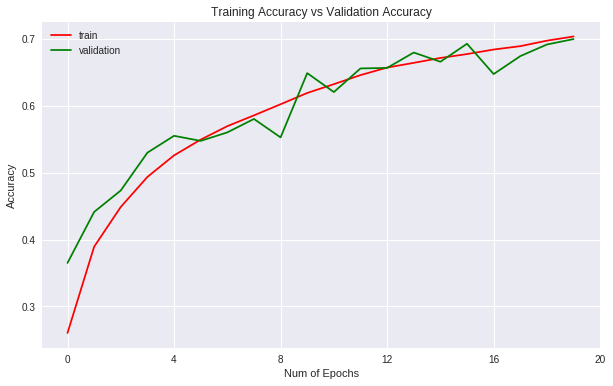

In [ ]:
model4, history4 = get_trained_model(loss='mean_squared_error')
model5, history5 = get_trained_model(loss='categorical_hinge')
model6, history6 = get_trained_model(loss='kullback_leibler_divergence')
model7, history7 = get_trained_model(loss='cosine_proximity')

# 5.3 EPOCHS

The next step was to try out different Epochs on our base architecture to see which one provides the best possible validation and testing loss.

- Epochs : 80
- Epochs : 50
- Epochs : 100
- Epochs : 40  

Our experiments yielded that after approximately 50 epochs, the model metrics begin to plateau  

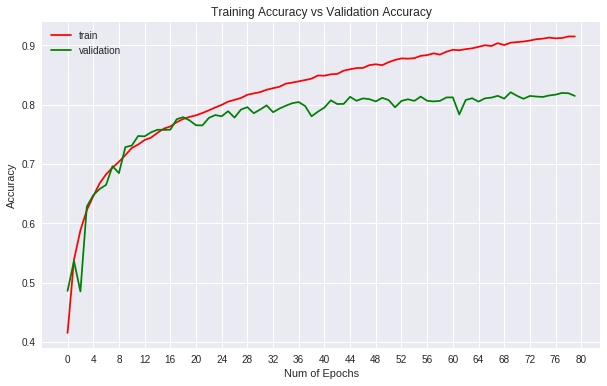

In [ ]:
model9,history9 = get_trained_model(epochs = 50)
model10,history10 = get_trained_model(epochs = 80)
model11,history11 = get_trained_model(epochs = 100)
model12,history12 = get_trained_model(epochs = 40)

# 5.4 OPTIMIZERS

Then we tried different Optimizers on our base architecture to see which one provides the best possible validation and testing loss.

- ADAM
- RMSProp
- ADAGRAD
- ADADELTA  

Our experiments yielded that ADAM performed the best  

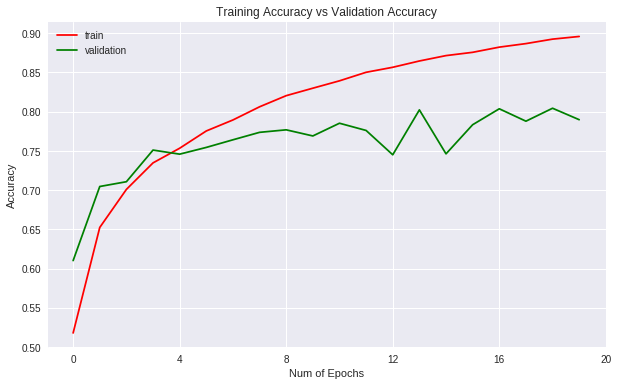

In [ ]:
model13,history13 = get_trained_model(optimizer='adam')
model14,history14 = get_trained_model(optimizer='RMSProp')
model15,history15 = get_trained_model(optimizer='Adagrad')
model16,history16 = get_trained_model(optimizer='Adadelta')

# 5.5 NETWORK ARCHITECTURE

## 5.5.1 INCREASING THE DEPTH OF THE NETWORK

- After conducting our experiments on the previous architecture, we decided to increase the number of layers having the following configuration :  

    - Convolution Layers : 6
    - Network Architecture : 32, 32, 64, 64, 128, 128
    - Flattened Output Layer : 512

Source : https://blog.plon.io/tutorials/cifar-10-classification-using-keras-tutorial/

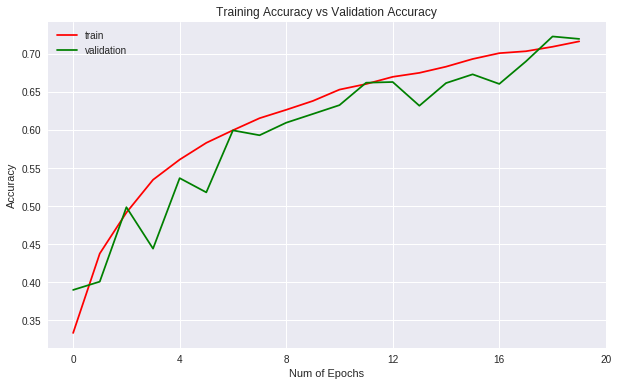

In [ ]:
def get_trained_model_new(activation='relu', loss='categorical_crossentropy', optimizer='sgd', epochs = 20, kernel_initializer ='glorot_uniform', bias_initializer ='glorot_uniform'):
        model = Sequential()
        
        #Layer1
        model.add(Conv2D(32, (2,2), input_shape = x_train.shape[1:], kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        #Layer2
        model.add(Conv2D(32, (2,2), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(2,2))
        model.add(Dropout(0.2))
        
        #Layer3
        model.add(Conv2D(64, (2,2), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
    
        #Layer4
        model.add(Conv2D(64, (2,2), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(2,2))
        model.add(Dropout(0.2))
                
        #Layer5
        model.add(Conv2D(128,(3,3), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

        #Layer6
        model.add(Conv2D(128,(3,3), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(BatchNormalization())
        model.add(Activation(activation))
        model.add(MaxPooling2D(2,2))

        
        model.add(Flatten())
        model.add(Dense(512))
        model.add(BatchNormalization())
        model.add(Activation(activation))
        model.add(Dropout(0.2))
        
        model.add(Dense(10))
        model.add(Activation('softmax'))
                  
        model.compile(loss = loss, optimizer = optimizer, metrics=['accuracy'])
          
        history = model.fit(x = x_train, y = y_train, validation_data = (x_test,y_test), batch_size= 64, epochs= epochs)
                  
        return model, history

## 5.5.2 INCREASING THE WIDTH OF THE NETWORK

- After increasing the depth of the model, we decided to increase the 'width' of the model by having double the neurons in each layer with a network having the following configuration :

    - Convolution Layers : 6
    - Network Architecture : 64, 64, 128, 128, 256, 256
    - Flattened Output Layer : 512
    
As expected, the increase in the number of neurons in each layer betters the validation metrics, even though there is an over fit

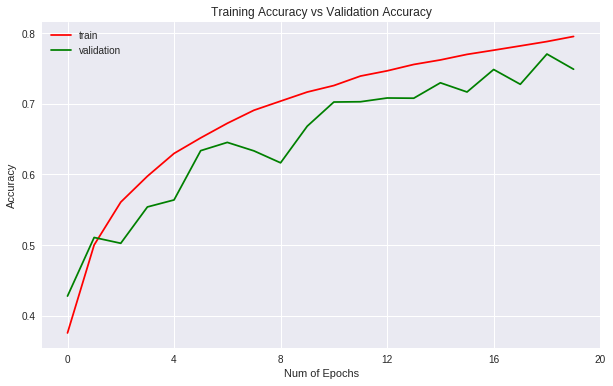

In [ ]:
def get_trained_model_double(activation='relu', loss='categorical_crossentropy', optimizer='sgd', epochs = 20, kernel_initializer ='glorot_uniform', bias_initializer ='glorot_uniform'):
        model = Sequential()
        
        #Layer1
        model.add(Conv2D(64, (2,2), input_shape = x_train.shape[1:], kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        
        #Layer2
        model.add(Conv2D(64, (2,2), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(2,2))
        model.add(Dropout(0.2))
        
        #Layer3
        model.add(Conv2D(128, (2,2), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
    
        #Layer4
        model.add(Conv2D(128, (2,2), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(2,2))
        model.add(Dropout(0.2))
                
        #Layer5
        model.add(Conv2D(256,(3,3), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(Activation(activation))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

        #Layer6
        model.add(Conv2D(256,(3,3), kernel_initializer = kernel_initializer, bias_initializer = bias_initializer))
        model.add(BatchNormalization())
        model.add(Activation(activation))
        model.add(MaxPooling2D(2,2))

        
        model.add(Flatten())
        model.add(Dense(512))
        model.add(BatchNormalization())
        model.add(Activation(activation))
        model.add(Dropout(0.2))
        
        model.add(Dense(10))
        model.add(Activation('softmax'))
                  
        model.compile(loss = loss, optimizer = optimizer, metrics=['accuracy'])
          
        history = model.fit(x = x_train, y = y_train, validation_data = (x_test,y_test), batch_size= 64, epochs= epochs)
                  
        return model, history

# 5.6 NETWORK INITIALIZATIONS

After this we tried different Network Initializers on our base architecture to see which one provides the best possible validation and testing loss.

- Zero
- Random Uniform
- Xavier Glorot

Our experiments yielded that **Random Uniform Initialization on the kernel** performed the best  

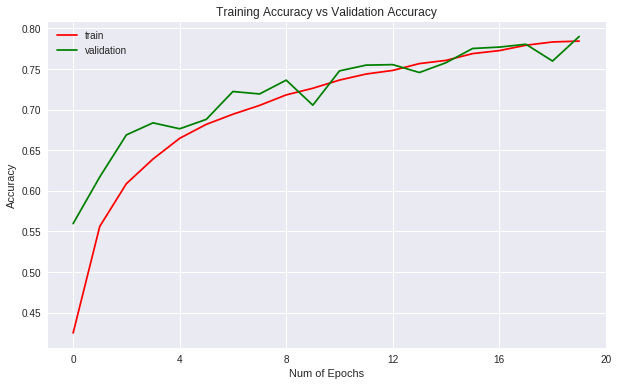

In [ ]:
model17, history17 = get_trained_model(kernel_initializer='Zeros')
model18, history18 = get_trained_model(bias_initializer='Zeros')

model19, history19 = get_trained_model(kernel_initializer='RandomUniform')
model20, history20 = get_trained_model(bias_initializer='RandomUniform')

model21, history21 = get_trained_model(kernel_initializer='glorot_normal')
model22, history22 = get_trained_model(bias_initializer='glorot_normal')

# 5.7 REGULARIZATION

# 5.7.1 L2

Due to the overfitting problem, we faced in the previous experiments, we tried to do regularization on the data and see if the training and testing metrics are nearly equal.  

### The L2 Regularization gets us an accuracy of 82.2%

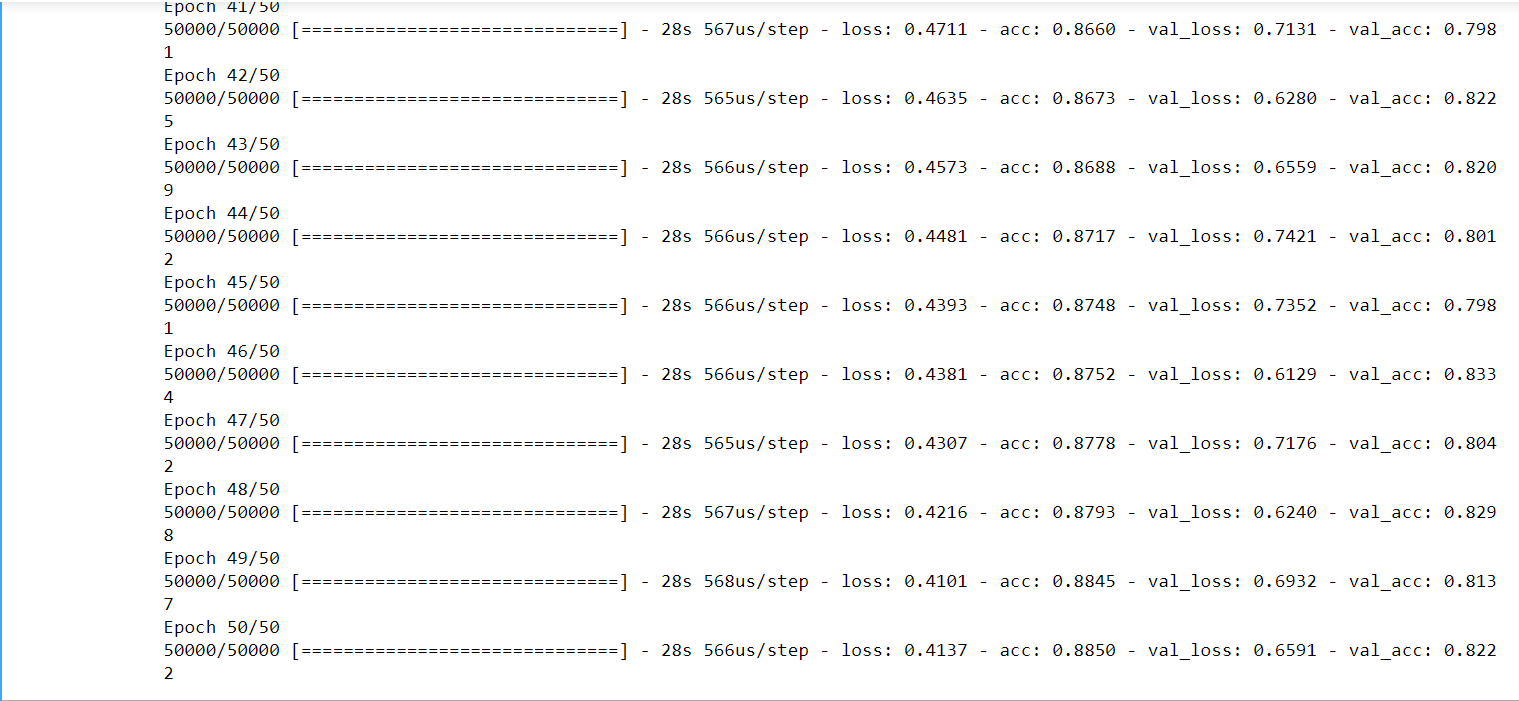

In [ ]:
model = Sequential()

weight_decay  = 0.0003
weight_decay_1= 0.0001  
#layer1
model.add(Conv2D(32,(3,3),input_shape=[32,32,3],kernel_regularizer=regularizers.l2(weight_decay_1),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#layer2
model.add(Conv2D(32,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

#layer 3
model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))


#layer4
model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

#layer5


model.add(Conv2D(128,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#layer6

model.add(Conv2D(128,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

# 5.7.2 L1

### The L1 Regularization gets us an accuracy of 75.81%

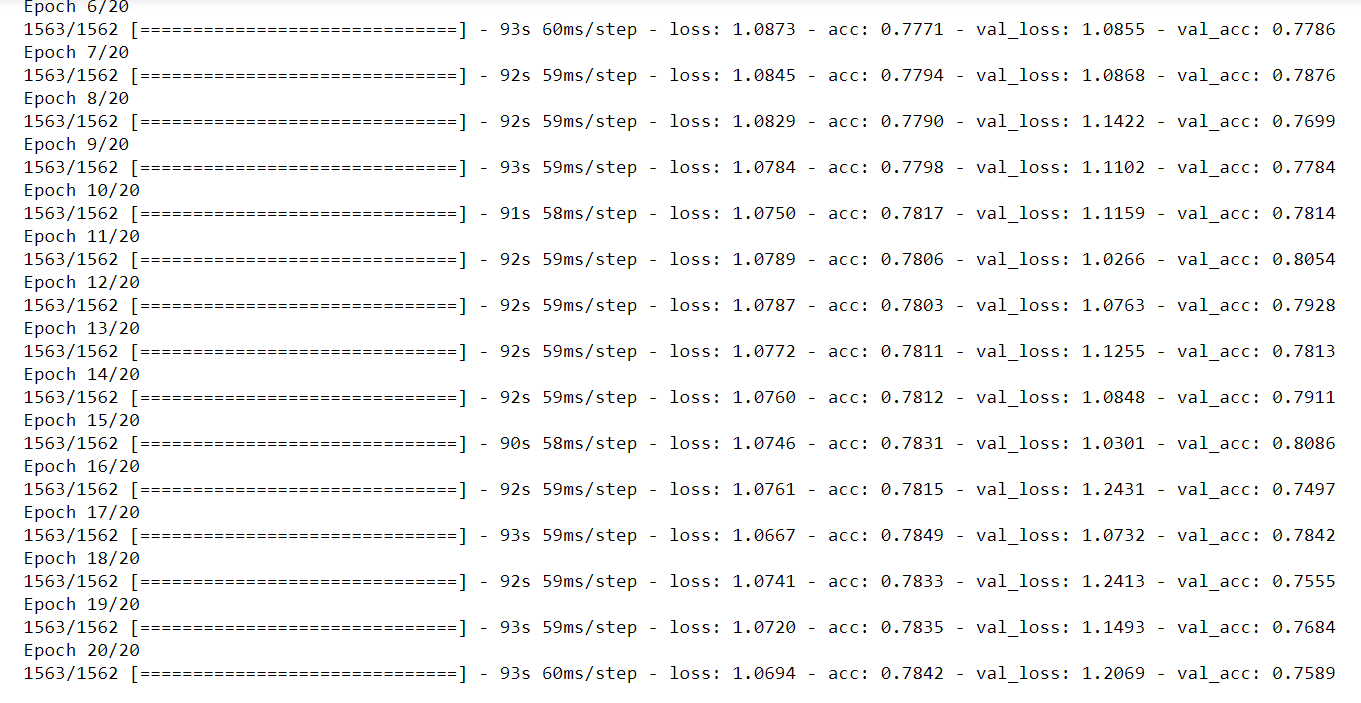

In [ ]:
model = Sequential()

weight_decay  = 0.0003
weight_decay_1= 0.0001  
#layer1
model.add(Conv2D(32,(3,3),input_shape=[32,32,3],kernel_regularizer=regularizers.l1(weight_decay_1),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#layer2
model.add(Conv2D(32,(3,3),kernel_regularizer=regularizers.l1(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

#layer 3
model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l1(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))


#layer4
model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l1(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

#layer5


model.add(Conv2D(128,(3,3),kernel_regularizer=regularizers.l1(0.0003),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#layer6

model.add(Conv2D(128,(3,3),kernel_regularizer=regularizers.l1(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

# 5.8 DATA AUGMENTATION

We researched online and found that we can flip, resize and rotate images using Data Augmentation techniques to better the accuracy of our model, hence we employed this technique here as well

Source : https://towardsdatascience.com/image-augmentation-for-deep-learning-using-keras-and-histogram-equalization-9329f6ae5085

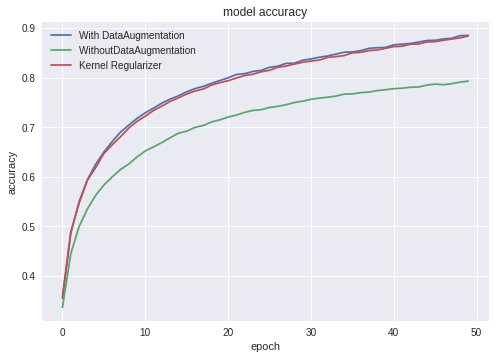

In [ ]:
def get_model(activation='relu',loss='categorical_crossentropy',optimizer='sgd', epochs = 20):
  model = Sequential()
  
  model.add(Conv2D(32,(3,3),input_shape=[32,32,3],padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  #layer2
  model.add(Conv2D(32,(3,3),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(2,2))

  #layer 3
  model.add(Conv2D(64,(3,3),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.4))


  #layer4
  model.add(Conv2D(64,(3,3),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(2,2))

  #layer5
  model.add(Conv2D(128,(3,3),padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  #layer6
  model.add(Conv2D(128,(3,3),padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(2,2))
  
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Dropout(0.3))
  model.add(Dense(10,activation='softmax'))
  model.summary()
  
  reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.2,
                              patience=15, min_lr=0.001)
  
  model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  
  datagen = ImageDataGenerator(
      
      featurewise_center=False,
      featurewise_std_normalization=False,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      vertical_flip = False)
  
  datagen.fit(x_train)
    
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch=len(x_train) / 32, epochs=50,
                    validation_data = (x_test,y_test),callbacks= [reduce_lr])
    
  return model, history

# FINAL MODEL

After all of our above experiments we land with the following model as shown with the configuration below,  

### The final model gives us an accuracy and loss of 87.31% and 0.4733


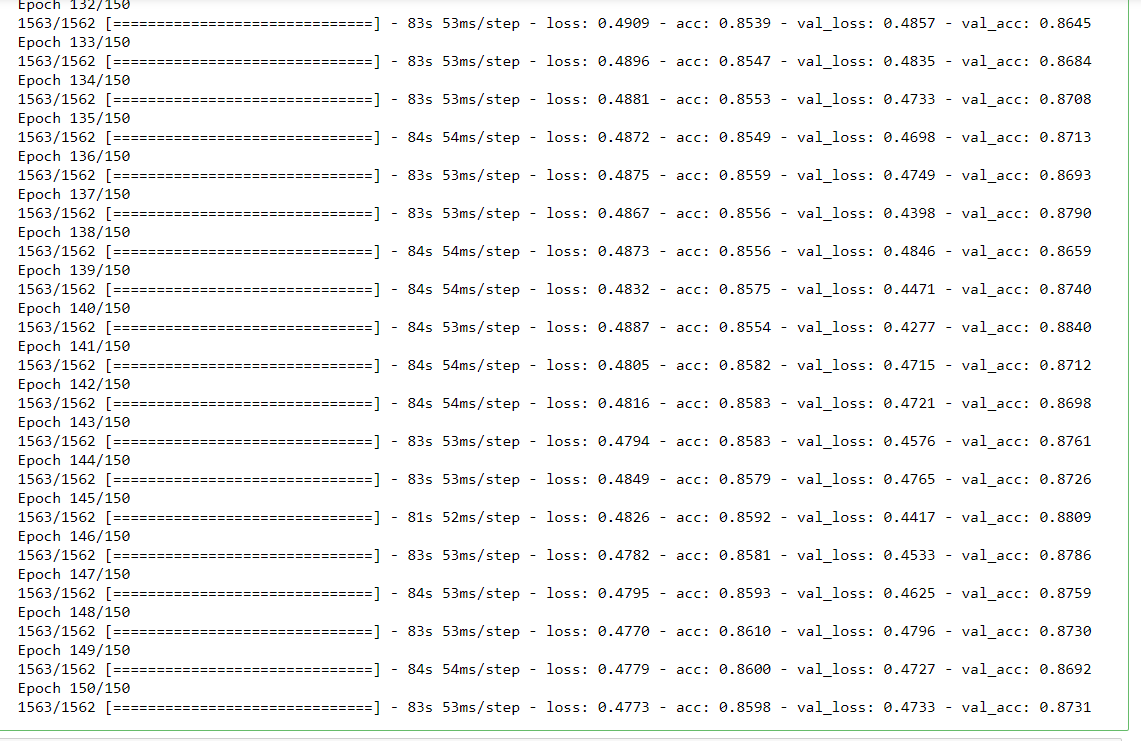

In [ ]:
# Defining a keras sequential with 6 Layer of convultional layer

model = Sequential()

weight_decay  = 0.0003
weight_decay_1= 0.0001  
#layer1
model.add(Conv2D(32,(3,3),input_shape=[32,32,3],kernel_regularizer=regularizers.l2(weight_decay_1),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#layer2
model.add(Conv2D(32,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

#layer 3
model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))


#layer4
model.add(Conv2D(64,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

#layer5


model.add(Conv2D(128,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#layer6

model.add(Conv2D(128,(3,3),kernel_regularizer=regularizers.l2(0.0003),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

# Final fully connected layer
model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

#The below code is custom reduced learning rate where the network would maintain a certain ratio of learning rate and monitors validation accuracy.
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.2,
                              patience=15, min_lr=0.001)

# Defining optimizer for the network with specific learning rate
SGD = SGD(lr=0.01, decay=1e-6, momentum=0.9)

# This function compiles or has all the necessary configuration needed to run the model
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

# Below is the inbuilt keras function for image augmentaion that provides flexibilty for the image flipping
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip = False)

history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch=len(x_train) / 32, epochs=150,
                    validation_data = (x_test,y_test),callbacks= [reduce_lr])

# VGG16 MODEL PERFORMANCE

- We declared at the start that VGG16 is our gold standard for image classification, however it is computationally very heavy as it requires a lot of parameters to be adjusted.  


- Here we see that the VGG16 model gives us an accuracy of **93% with a loss of 0.4604**, while our best model fared pretty close with **87.31% and 0.4733.**


- While we may not have beaten the VGG16 but we definitely came close and would explore in the future about other techniques that can possibly improve upon our experiments.  


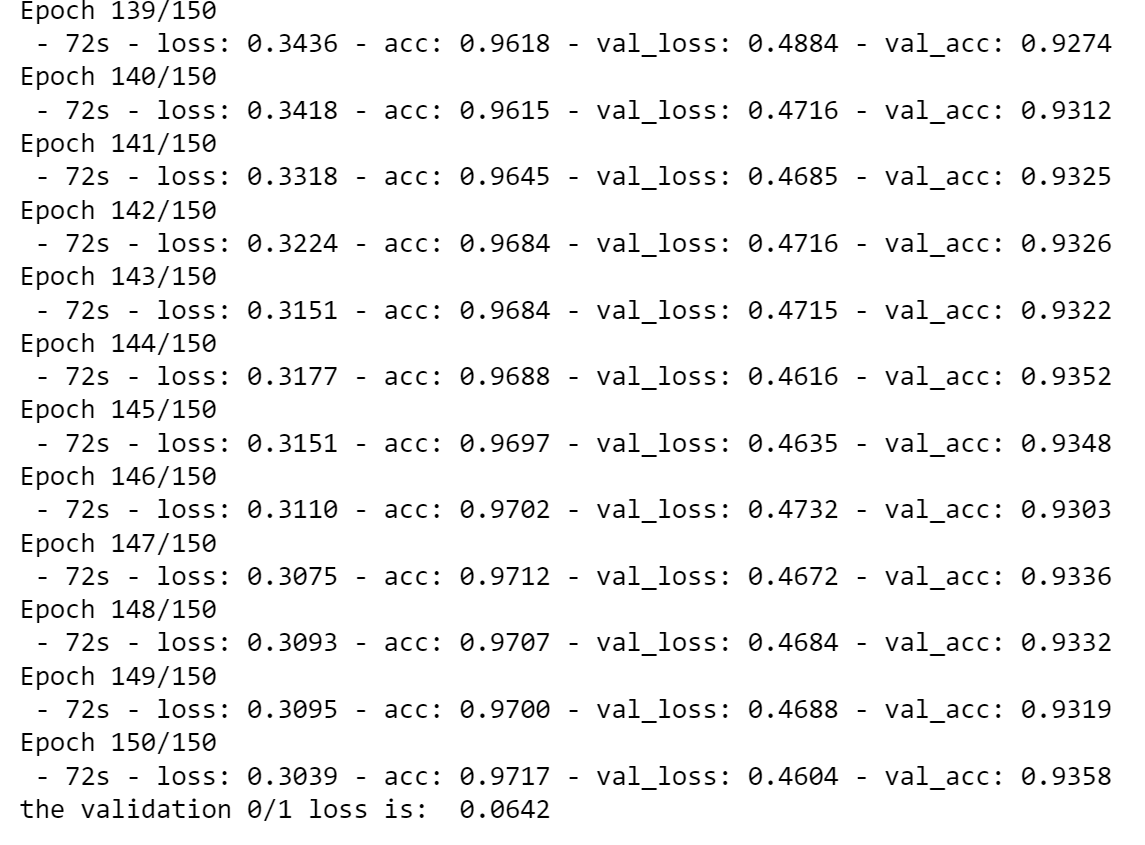

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers

class cifar10vgg:
    def __init__(self,train=True):
        self.num_classes = 10
        self.weight_decay = 0.0005
        self.x_shape = [32,32,3]

        self.model = self.build_model()
        if train:
            self.model = self.train(self.model)
        else:
            self.model.load_weights('cifar10vgg.h5')


    def build_model(self):
        # Build the network of vgg for 10 classes with massive dropout and weight decay as described in the paper.

        model = Sequential()
        weight_decay = self.weight_decay

        model.add(Conv2D(64, (3, 3), padding='same',
                         input_shape=self.x_shape,kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

        model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.5))

        model.add(Flatten())
        model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(Dropout(0.5))
        model.add(Dense(self.num_classes))
        model.add(Activation('softmax'))
        return model


    def normalize(self,X_train,X_test):
        #this function normalize inputs for zero mean and unit variance
        # it is used when training a model.
        # Input: training set and test set
        # Output: normalized training set and test set according to the trianing set statistics.
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7)
        return X_train, X_test

    def normalize_production(self,x):
        #this function is used to normalize instances in production according to saved training set statistics
        # Input: X - a training set
        # Output X - a normalized training set according to normalization constants.

        #these values produced during first training and are general for the standard cifar10 training set normalization
        mean = 120.707
        std = 64.15
        return (x-mean)/(std+1e-7)

    def predict(self,x,normalize=True,batch_size=50):
        if normalize:
            x = self.normalize_production(x)
        return self.model.predict(x,batch_size)

    def train(self,model):

        #training parameters
        batch_size = 128
        maxepoches = 150
        learning_rate = 0.1
        lr_decay = 1e-6
        lr_drop = 20
        # The data, shuffled and split between train and test sets:
        (x_train, y_train), (x_test, y_test) = cifar10.load_data()
        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train, x_test = self.normalize(x_train, x_test)

        y_train = keras.utils.to_categorical(y_train, self.num_classes)
        y_test = keras.utils.to_categorical(y_test, self.num_classes)

        def lr_scheduler(epoch):
            return learning_rate * (0.5 ** (epoch // lr_drop))
        reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

        #data augmentation
        datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images
        # (std, mean, and principal components if ZCA whitening is applied).
        datagen.fit(x_train)



        #optimization details
        sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])


        # training process in a for loop with learning rate drop every 25 epoches.

        historytemp = model.fit_generator(datagen.flow(x_train, y_train,
                                         batch_size=batch_size),
                            steps_per_epoch=x_train.shape[0] // batch_size,
                            epochs=maxepoches,
                            validation_data=(x_test, y_test),callbacks=[reduce_lr],verbose=2)
        model.save_weights('cifar10vgg.h5')
        return model

# REFERENCES

CIFAR10 : https://www.cs.toronto.edu/~kriz/cifar.html  
STARTER CODE : https://blog.plon.io/tutorials/cifar-10-classification-using-keras-tutorial/  
DATA AUGMENTATION : https://towardsdatascience.com/image-augmentation-for-deep-learning-using-keras-and-histogram-equalization-9329f6ae5085  

# LICENSE

Copyright 2018  
COPYRIGHT ABHINAV TIWARI  
COPYRIGHT MANASA B SINGHEKAR  
COPYRIGHT NILESH NERKAR  

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.